# Анализа података о епидемији коронавируса

In [1]:
import os
import json
import pandas as pd
import matplotlib.pyplot as plt
os.makedirs('img', exist_ok=True)

Учитавање *COVID-19* података из свих земаља на дневном нивоу. Можемо користити последње податке који су расположиви на дневном нивоу, у ком случају треба одкоментарисати први ред, а закоментарисати други. 

In [2]:
#t = pd.read_exel('data/COVID-19-geographic-disbtribution-worldwide-2020-12-14.xlsx')
t = pd.read_csv('data/covid-worldwide.csv', parse_dates=['dateRep'], dayfirst=True)
t.head()

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,2020-07-12,12,7,2020,85,16,Afghanistan,AF,AFG,38041757.0,Asia,10.081028
1,2020-07-11,11,7,2020,458,37,Afghanistan,AF,AFG,38041757.0,Asia,10.291323
2,2020-07-10,10,7,2020,255,20,Afghanistan,AF,AFG,38041757.0,Asia,9.812901
3,2020-07-09,9,7,2020,59,1,Afghanistan,AF,AFG,38041757.0,Asia,10.351783
4,2020-07-08,8,7,2020,210,16,Afghanistan,AF,AFG,38041757.0,Asia,10.811803


In [3]:
t_russia = t[(t["countriesAndTerritories"] == "Russia") & (t['dateRep'] >= '2020-03-12')  & (t['dateRep'] <= '2020-06-30')].sort_values('dateRep')
t_russia.head(20)

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
22496,2020-03-12,12,3,2020,15,0,Russia,RU,RUS,145872260.0,Europe,0.015767
22495,2020-03-13,13,3,2020,5,0,Russia,RU,RUS,145872260.0,Europe,0.019195
22494,2020-03-14,14,3,2020,15,0,Russia,RU,RUS,145872260.0,Europe,0.029478
22493,2020-03-15,15,3,2020,14,0,Russia,RU,RUS,145872260.0,Europe,0.039075
22492,2020-03-16,16,3,2020,4,0,Russia,RU,RUS,145872260.0,Europe,0.041817
22491,2020-03-17,17,3,2020,30,0,Russia,RU,RUS,145872260.0,Europe,0.061698
22490,2020-03-18,18,3,2020,21,0,Russia,RU,RUS,145872260.0,Europe,0.075408
22489,2020-03-19,19,3,2020,33,0,Russia,RU,RUS,145872260.0,Europe,0.098031
22488,2020-03-20,20,3,2020,52,0,Russia,RU,RUS,145872260.0,Europe,0.133679
22487,2020-03-21,21,3,2020,54,0,Russia,RU,RUS,145872260.0,Europe,0.166584


In [4]:
sc = t_russia.set_index('dateRep')["cases"]

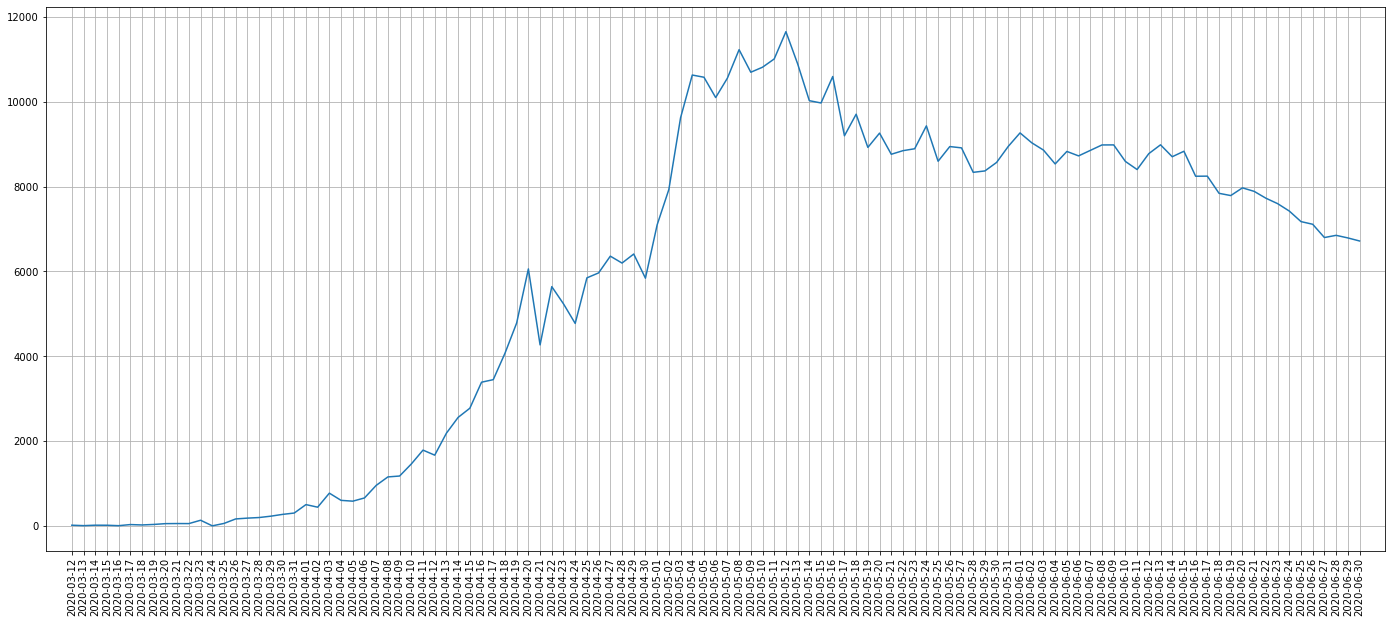

In [5]:
plt.figure(figsize=(24,10))
plt.plot(sc.index, sc)
plt.xticks(sc.index, rotation=90)
plt.margins(x=0.02)
plt.grid(True)
plt.savefig("img/rusija1.png", bbox_inches='tight', dpi=150)
plt.show()

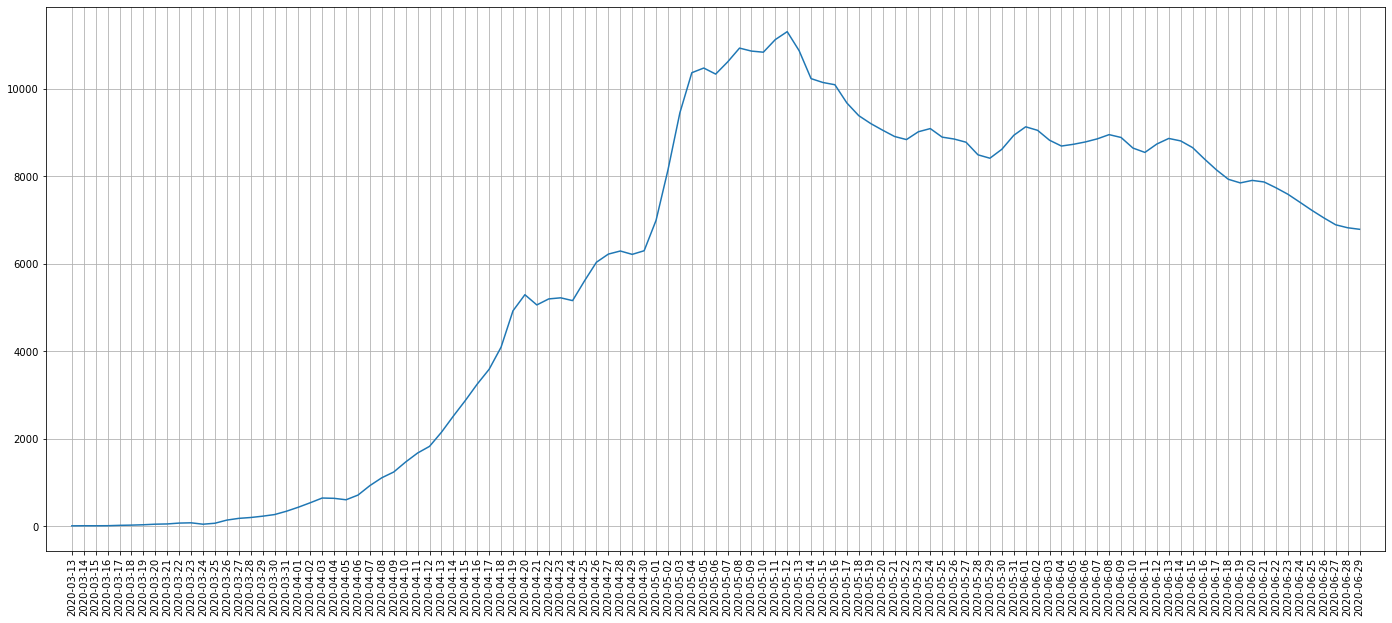

In [6]:

sc1 =  (sc.shift(-1)* 0.25 + sc * 0.5 + sc.shift(1) * 0.25).dropna()
plt.figure(figsize=(24,10))
plt.plot(sc1.index, sc1)
plt.xticks(sc1.index, rotation=90)
plt.margins(x=0.02)
plt.grid(True)
plt.savefig("img/rusija1s.png", bbox_inches='tight', dpi=150)
plt.show()

In [7]:
sc[[0]]

dateRep
2020-03-12    15
Name: cases, dtype: int64

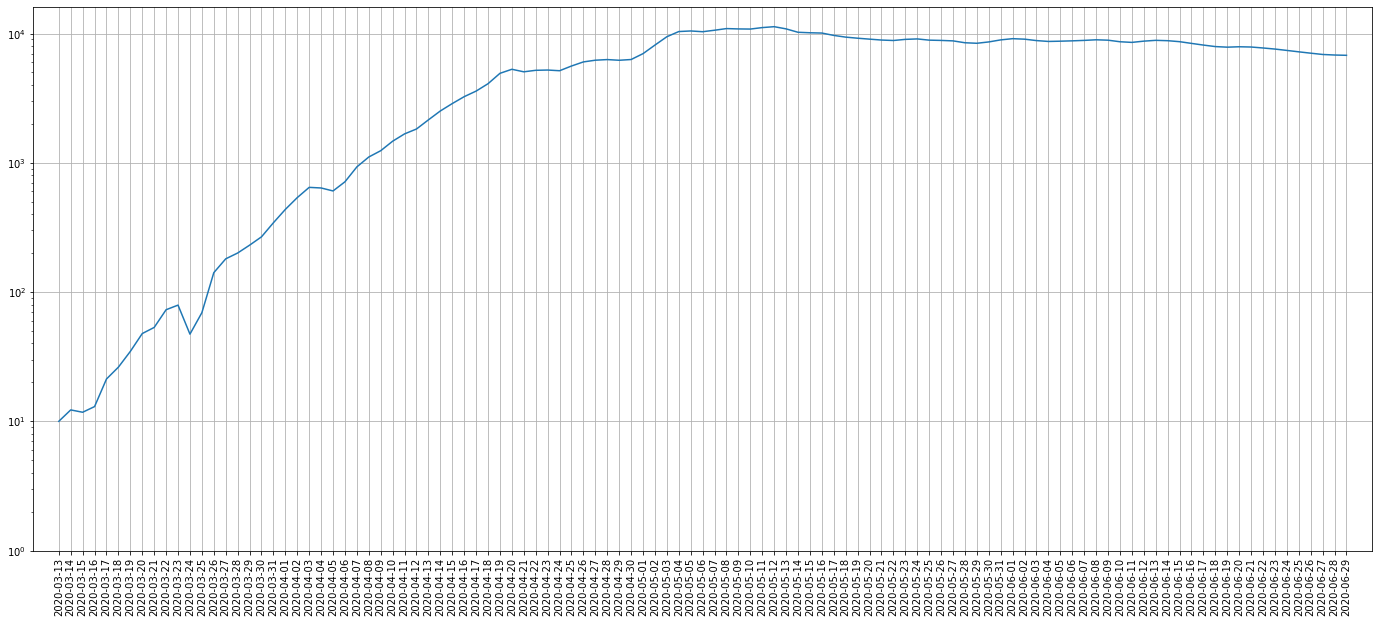

In [8]:
plt.figure(figsize=(24,10))
plt.plot(sc1.index, sc1)
plt.xticks(sc1.index, rotation=90)
plt.yscale("log")
plt.yticks([10**i for i in range(5)])
plt.margins(x=0.02)
plt.grid(True)
plt.savefig("img/rusija1slog.png", bbox_inches='tight', dpi=150)
plt.show()


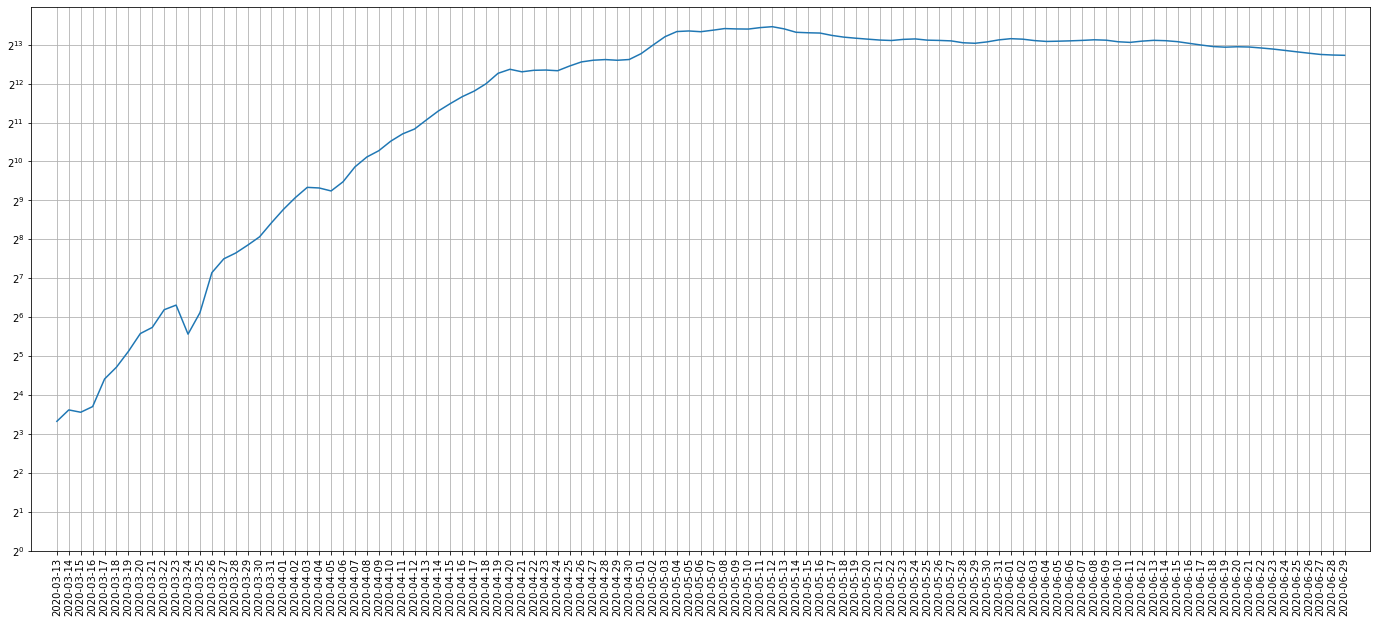

In [9]:
plt.figure(figsize=(24,10))
plt.plot(sc1.index, sc1)
plt.xticks(sc1.index, rotation=90)
plt.yscale("log", basey=2)
plt.yticks([2**i for i in range(14)])
plt.margins(x=0.02)
plt.grid(True)
plt.savefig("img/rusija1slog2.png", bbox_inches='tight', dpi=150)
plt.show()

In [10]:
with open('data/serbia-offitial.json','r',encoding='utf8') as f:
    json_data = json.load(f)

In [11]:
for json_serija in json_data:
    if json_serija["dataCode"] == "BROJ_POZITIVNIH_LICA_ZA_DATI_DATUM":
        #print(json_serija)
        v = [stavka["ordinate"] for stavka in json_serija["points"]]
        i = [stavka["abscissa"]["date"] for stavka in json_serija["points"]]
        s = pd.Series(v, index=i)
s1 = s['2020-08-30':'2020-09-30']

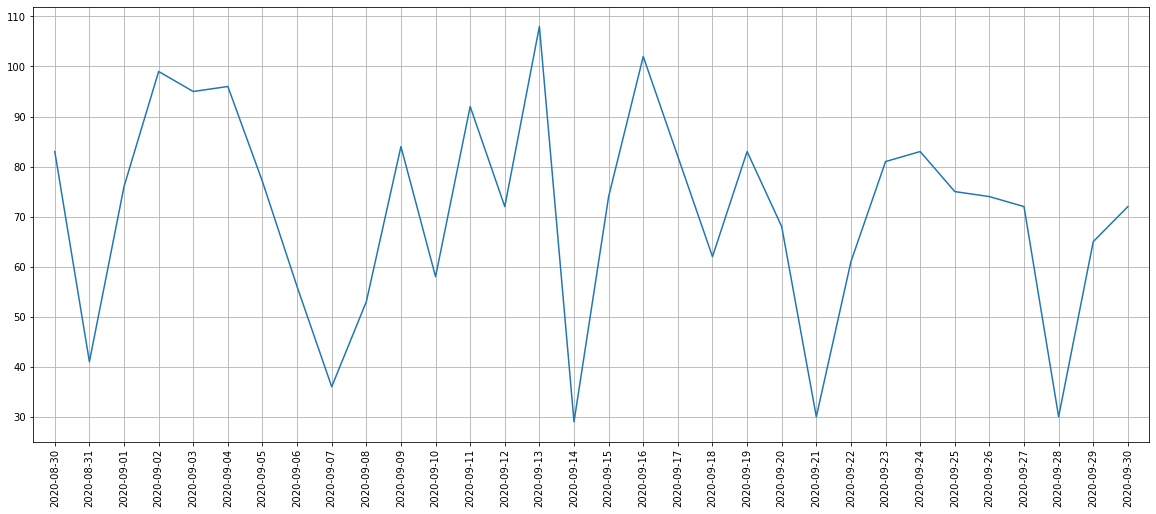

In [12]:
plt.figure(figsize=(20,8))
plt.plot(s1.index, s1)
plt.xticks(s1.index, rotation=90)
plt.margins(x=0.02)
plt.grid(True)
plt.savefig("img/srbija1.png", bbox_inches='tight', dpi=150)
plt.show()